# Regressão Linear

Aula prática de regressão linear.
O objetivo é prever o custo da diária de um imóvel baseado ao número de pessoas



### Importando bibliotecas

In [1]:
# importando as bibliotecas
import pandas as pd # Trabalhar com tabelas e importação dos arquivos utilizados
import plotly.express as px # biblioteca para criar gráficos dinâmicos
import seaborn as sns # biblioteca para gráficos
import numpy as np #funções matemáticas de alto nível
from sklearn.metrics import mean_squared_error, mean_absolute_error



### Coletando dados

In [8]:
custo_diaria = pd.read_csv('./custo_diaria.csv', sep= ';')

### Analisando os dados coletados

In [10]:
#visualizando arquivos da base de dados
custo_diaria.head()

,qtd_pessoas,valor_diaria
0,1,150
1,4,385
2,6,499
3,10,680
4,13,735


In [13]:
#Gerando algumas estatisticas da base de dados
custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,15.000000,15.000000
mean,24.533333,1348.600000
std,16.796542,823.087116
min,1.000000,150.000000
25%,11.500000,707.500000
50%,22.000000,1075.000000
75%,41.000000,2044.500000
max,50.000000,2680.000000


In [12]:
# Verificando se existe algum valor nulo ou ausente
custo_diaria.isna().sum()

,0
qtd_pessoas,0
valor_diaria,0


In [14]:
# Verificando informações da base de dados
custo_diaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   qtd_pessoas   15 non-null     int64
 1   valor_diaria  15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes


### Analise de correlação entre as variáveis

- Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, possuem uma relação direta.

- Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa.

In [15]:
custo_diaria.corr()

,qtd_pessoas,valor_diaria
qtd_pessoas,1.000000,0.992069
valor_diaria,0.992069,1.000000


### Analise gráfica da correlação entre as variáveis

<Axes: >

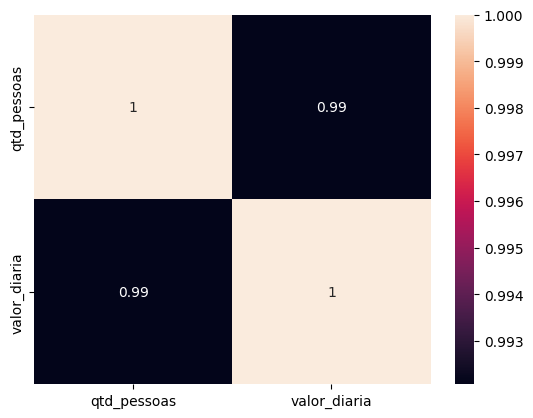

In [16]:
correlacao = custo_diaria.corr()
plot = sns.heatmap(correlacao, annot=True)
plot

Perceba que temos uma correlçao forte positiva. Pois a medida que a quantidade de pessoas aumenta o preço da diária também aumenta.
Além disso, podemos dizer que em 98% do valor cobrado pelas diárias pode ser explicado pela quantidade de pessoas alugando o imóvel.


## Tratamento de dados
Nesta etapa, vamos preparar os dados para serem utilizados no modelo de Regressão Linear. Essa transformação deve ser realizada para que os dados possam ter o formato que o algoritmo solicitada como entrada.

### Criando variável independente - X
Coletamos todos os registros da primeira coluna e convertemos no formato de array

In [17]:
X = custo_diaria.iloc[:,0].values
print(X)

[ 1  4  6 10 13 15 18 22 25 30 40 42 45 47 50]


A função iloc permite selecionar um conjunto de registros. o dois pontos ":" significa que estamos selecionando todos os regisros e zero "0" a primeira coluna

### Criando variável dependente - y (o que queremos predizer)

In [18]:
#criando variável dependente (o que queremos predizer)
y = custo_diaria.iloc[:,1].values
print(y)

[ 150  385  499  680  735  859  989 1075 1500 1850 2000 2089 2250 2488
 2680]


### Verificando tipo de variáveis

In [19]:
type(X)

numpy.ndarray

In [20]:
type(y)

numpy.ndarray

In [21]:
X.shape

(15,)

### Transformando array em matriz

In [22]:
X = X.reshape(-1,1)
X

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]])

In [23]:
# Agora nós temos uma matriz com duas colunas.
X.shape

(15, 1)

# Criando modelo de Machine Learning - Regressão Linear

In [24]:
from sklearn.linear_model import LinearRegression
# cria um objeto do tipo regressão linear
predicao_custo_diaria = LinearRegression()

In [27]:
type(predicao_custo_diaria)

sklearn.linear_model._base.LinearRegression

# Realizando o Treinamento do modelo

In [28]:
predicao_custo_diaria.fit(X, y)

LinearRegression()

## Calculando a constante alfa - intercept

In [30]:
predicao_custo_diaria.intercept_

np.float64(155.91874556932066)

## Calculando a o coeficiente angular da reta - coef

In [31]:
predicao_custo_diaria.coef_

array([48.61472504])

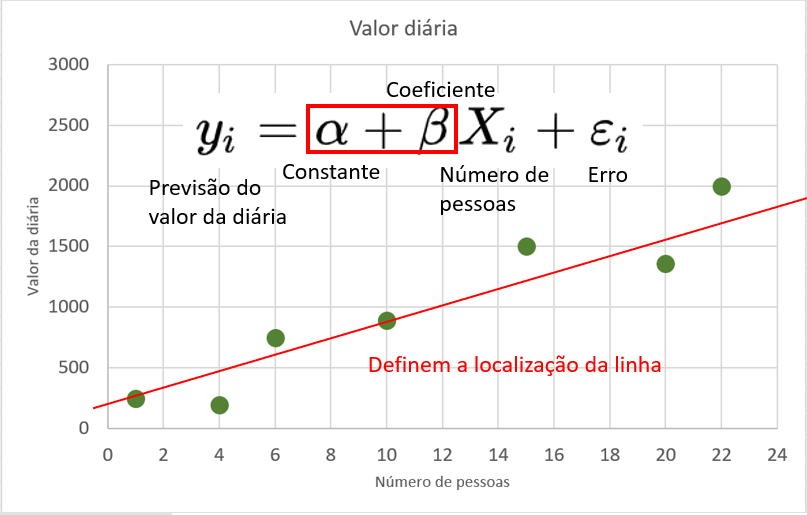

## Realizando a predição dos valores das diárias

Baseado no número de pessoas, vamos estimar/prever o custo do imóvel alugado

In [32]:
previsao_valores = predicao_custo_diaria.predict(X)

In [34]:
#visualiza das previsões para cada nª de pessoas
previsao_valores

array([ 204.53347061,  350.37764575,  447.60709584,  642.06599602,
        787.91017115,  885.13962124, 1030.98379637, 1225.44269655,
       1371.28687169, 1614.36049691, 2100.50774736, 2197.73719745,
       2343.58137258, 2440.81082267, 2586.65499781])

# Visualizando no gráfico as disposições dos dados
Para visualizar os dados no grafico, temos que transformar os valores das variáveis para o formato de vetor. Para isso utilizamos o comando ravel()

In [35]:
# Verificando tipo da variável X_custo_diaria
X

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]])

In [38]:
X = X.ravel() # transforma em um vetor
X

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [39]:
y

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680])

In [40]:
grafico = px.scatter(x = X , y = y)
grafico.show()

In [41]:
grafico = px.scatter(x = X, y = y)
grafico.add_scatter(x = X, y = previsao_valores, name= 'previsões')
grafico.show()

### Calculando o valor da diária de acordo com a Equação Linear

![image-4.png](attachment:image-4.png)

- 𝑦_𝑖 = 𝑃𝑟𝑒v𝑖𝑠ã𝑜 𝑑𝑜 𝑝𝑟𝑒ç𝑜 𝑑𝑎 𝑑𝑖á𝑟𝑖𝑎.
- 𝛼 = 𝐶𝑜𝑛𝑠𝑡𝑎𝑛𝑡𝑒.
- 𝛽 = 𝐶𝑜𝑒𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑒 𝑑𝑒 𝑖𝑛𝑐𝑙𝑖𝑛𝑎çã𝑜 𝑑𝑎 𝑟𝑒𝑡𝑎.
- 𝑋_𝑖 = 𝑁ú𝑚𝑒𝑟𝑜 𝑑𝑒 𝑝𝑒𝑠𝑠𝑜𝑎𝑠.
- 𝜀_𝑖 = 𝐸𝑟𝑟𝑜.


In [44]:
# Verificando os valores de um determinada previsão baseada na quantidade de pessoas

alfa = predicao_custo_diaria.intercept_
beta = predicao_custo_diaria.coef_
Xi = 8

alfa + beta * Xi

array([544.83654593])

## Calculando o valor da diária através da função predict do modelo

In [45]:
# Verificando de modo direto
predicao_custo_diaria.predict([[8]])

array([544.83654593])

# Avaliação do modelo


In [42]:
# Calculando a acurácia do modelo
predicao_custo_diaria.score(X.reshape(-1,1), y)

0.984200996064679

### Calculando o Mean absolut error
![image.png](attachment:image.png)

In [50]:
mean_absolute_error(y, previsao_valores)

83.84480977618742

### Calculando o Mean squared error!
![image-4.png](attachment:image-4.png)

In [49]:
# Mean squared error
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y, previsao_valores)
print(MSE)

9989.829839426571


### Calculando o Root Mean squared error

![image-5.png](attachment:image-5.png)

In [51]:
np.sqrt(MSE)

np.float64(99.9491362615334)